<a href="https://colab.research.google.com/github/Samukelo789/Data-Science-Projects/blob/main/Diabetes_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Loading Diabetes Dataset
url_diabetes = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_df = pd.read_csv(url_diabetes, names=column_names)

print("Diabetes Dataset Shape:", diabetes_df.shape)
print("\nFirst 5 rows:")
print(diabetes_df.head())
print("\nDataset Info:")
print(diabetes_df.info())
print("\nTarget Distribution:")
print(diabetes_df['Outcome'].value_counts(normalize=True))

Diabetes Dataset Shape: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies          

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

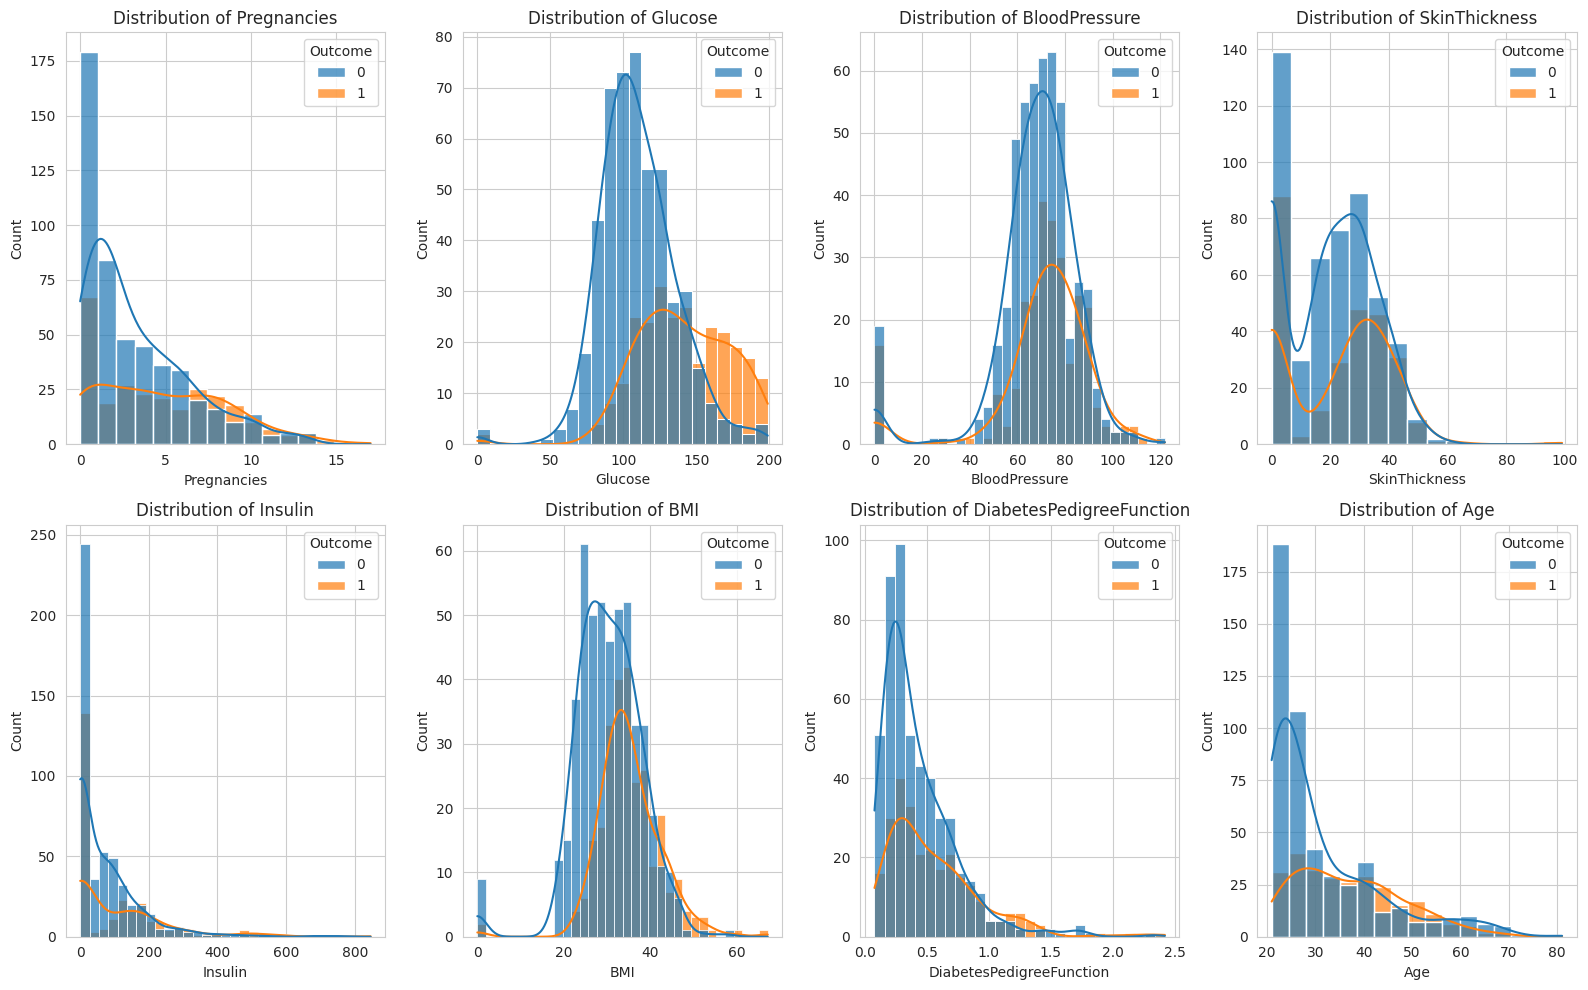

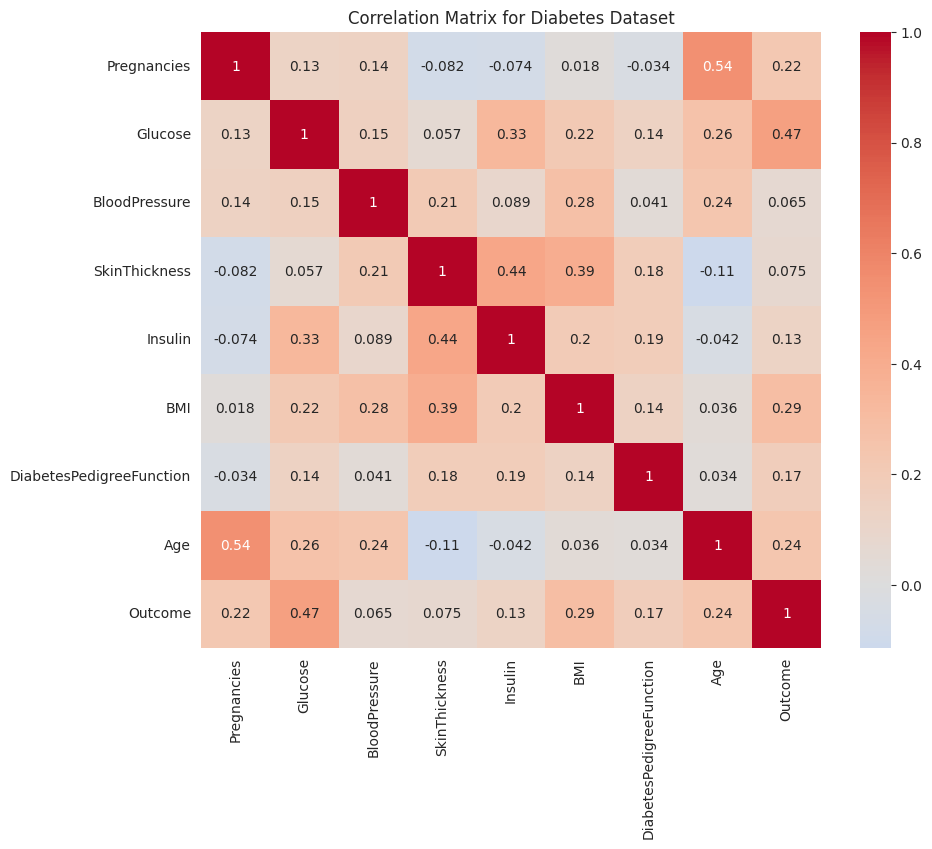

In [ ]:
print(diabetes_df.describe())

# Potential missing values
zero_counts = (diabetes_df == 0).sum()
print("\nZero Counts (Potential Missing Values):")
print(zero_counts)

# Distributions
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
for i, col in enumerate(column_names[:-1]):
    row = i // 4
    col_idx = i % 4
    sns.histplot(data=diabetes_df, x=col, kde=True, hue='Outcome', ax=axes[row, col_idx], alpha=0.7)
    axes[row, col_idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Diabetes Dataset')
plt.show()

In [ ]:
# Replace zeros with NaN
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_columns:
    diabetes_df[col].replace(0, np.nan, inplace=True)

# Fill NaN with median
for col in zero_columns:
    diabetes_df[col].fillna(diabetes_df[col].median(), inplace=True)

X_diabetes = diabetes_df.drop('Outcome', axis=1)
y_diabetes = diabetes_df['Outcome']

# Train-test split (stratify for imbalance)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42, stratify=y_diabetes)

scaler_d = StandardScaler()
X_train_d_scaled = scaler_d.fit_transform(X_train_d)
X_test_d_scaled = scaler_d.transform(X_test_d)

print("Preprocessed Data Shape - Train:", X_train_d_scaled.shape, "Test:", X_test_d_scaled.shape)
print("Train Class Distribution:", pd.Series(y_train_d).value_counts(normalize=True))
print("Test Class Distribution:", pd.Series(y_test_d).value_counts(normalize=True))

Preprocessed Data Shape - Train: (614, 8) Test: (154, 8)
Train Class Distribution: Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64
Test Class Distribution: Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


Logistic Regression Results:
Accuracy: 0.7142857142857143
AUC-ROC: 0.8114814814814815

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.58      0.67      0.62        54

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.73      0.71      0.72       154



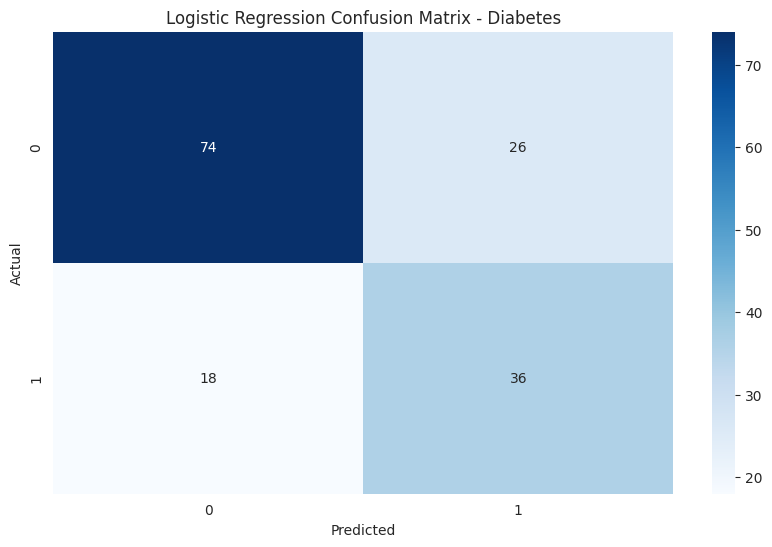


Random Forest Results:
Accuracy: 0.7402597402597403
AUC-ROC: 0.8146296296296296

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154



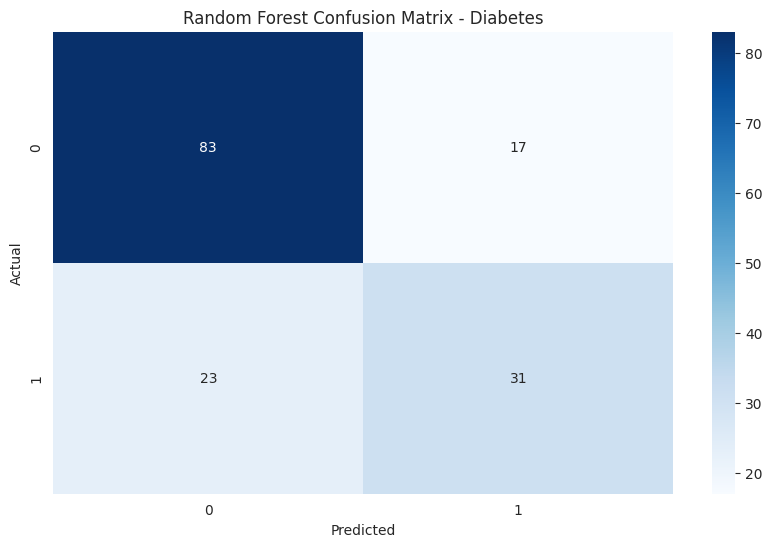

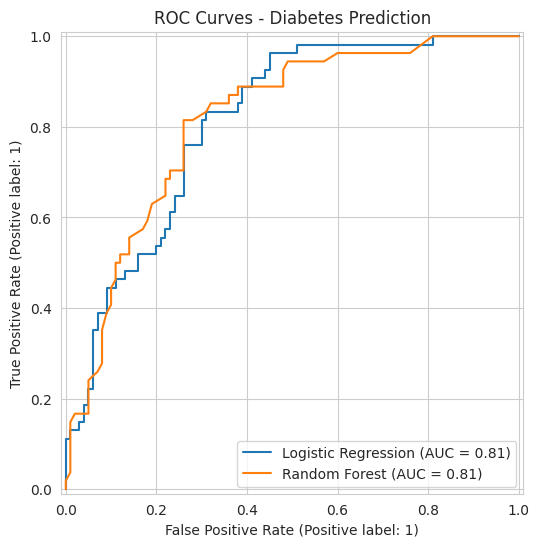

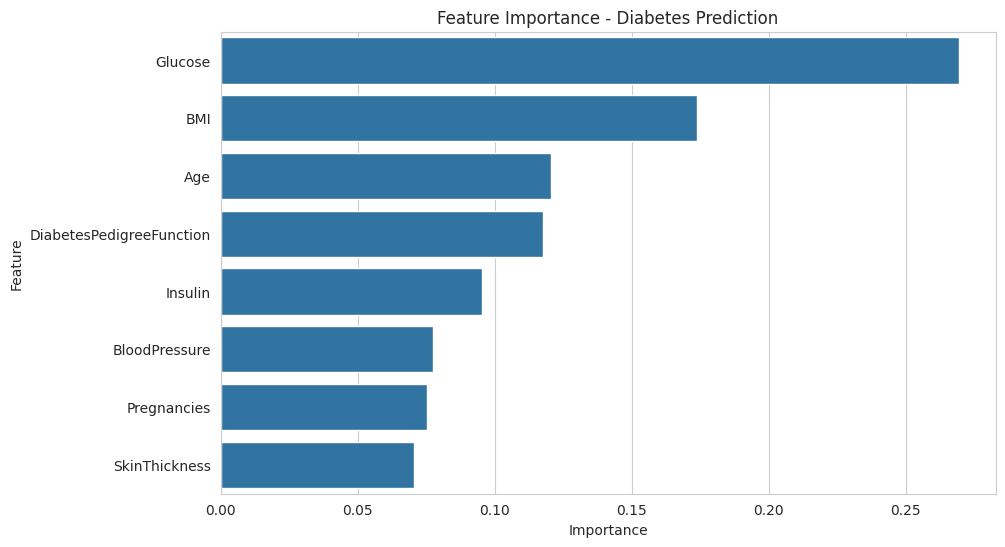

In [ ]:
smote = SMOTE(random_state=42)
X_train_d_res, y_train_d_res = smote.fit_resample(X_train_d_scaled, y_train_d)

# Logistic Regression
lr_d = LogisticRegression(random_state=42, max_iter=1000)
lr_d.fit(X_train_d_res, y_train_d_res)
y_pred_lr_d = lr_d.predict(X_test_d_scaled)
y_prob_lr_d = lr_d.predict_proba(X_test_d_scaled)[:, 1]
auc_lr_d = roc_auc_score(y_test_d, y_prob_lr_d)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test_d, y_pred_lr_d))
print("AUC-ROC:", auc_lr_d)
print("\nClassification Report:\n", classification_report(y_test_d, y_pred_lr_d))

cm_lr_d = confusion_matrix(y_test_d, y_pred_lr_d)
sns.heatmap(cm_lr_d, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix - Diabetes')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

rf_d = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_d.fit(X_train_d_scaled, y_train_d)
y_pred_rf_d = rf_d.predict(X_test_d_scaled)
y_prob_rf_d = rf_d.predict_proba(X_test_d_scaled)[:, 1]
auc_rf_d = roc_auc_score(y_test_d, y_prob_rf_d)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test_d, y_pred_rf_d))
print("AUC-ROC:", auc_rf_d)
print("\nClassification Report:\n", classification_report(y_test_d, y_pred_rf_d))

cm_rf_d = confusion_matrix(y_test_d, y_pred_rf_d)
sns.heatmap(cm_rf_d, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix - Diabetes')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(lr_d, X_test_d_scaled, y_test_d, ax=ax, name="Logistic Regression")
RocCurveDisplay.from_estimator(rf_d, X_test_d_scaled, y_test_d, ax=ax, name="Random Forest")
plt.title('ROC Curves - Diabetes Prediction')
plt.show()

importances_d = pd.DataFrame({'Feature': column_names[:-1], 'Importance': rf_d.feature_importances_})
importances_d = importances_d.sort_values('Importance', ascending=False)
sns.barplot(data=importances_d, x='Importance', y='Feature')
plt.title('Feature Importance - Diabetes Prediction')
plt.show()

In [ ]:
import joblib
joblib.dump(lr_d, 'logistic_regression_diabetes.pkl')
joblib.dump(rf_d, 'random_forest_diabetes.pkl')
joblib.dump(scaler_d, 'scaler_diabetes.pkl')
print("Models and scaler saved for potential deployment.")

Models and scaler saved for potential deployment.
